In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
%matplotlib inline

In [2]:
# Dataset >>> CIFAR-10
(xtrain, ytrain),(xtest, ytest) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
xtrain.shape[1:]

(32, 32, 3)

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

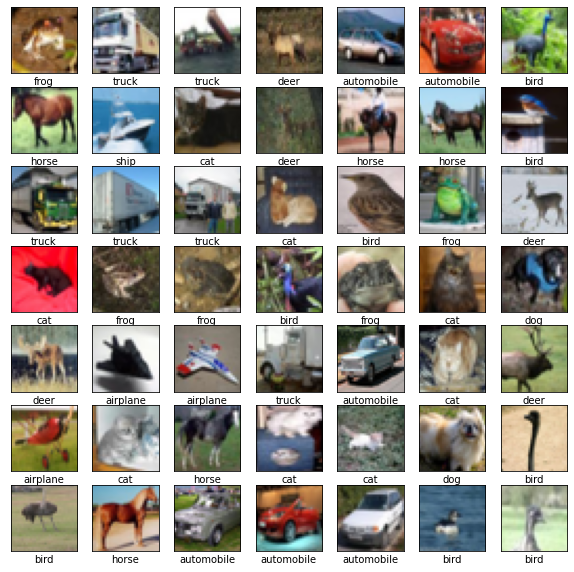

In [5]:
plt.figure(figsize=(10,10))
for i in range(49):
  plt.subplot(7, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i])
  plt.xlabel(classes[ytrain[i][0]])
plt.show()

In [6]:
x_train = xtrain.reshape(xtrain.shape[0], -1)/255
x_test = xtest.reshape(xtest.shape[0], -1)/255

In [7]:
m, nx = x_train.shape
nx,m

(3072, 50000)

#Using Custom MLP Block

In [8]:
class net(keras.layers.Layer):
  def __init__(self, units = 128, input_dims = 128):
      super(net, self).__init__()
      self.w = self.add_weight(shape = (input_dims, units), initializer = 'random_normal', trainable = True)
      self.b = self.add_weight(shape = (units,), initializer = 'zeros', trainable = True)
  
  def call(self, input):
    return tf.matmul(input, self.w) + self.b


In [9]:
class MLP(keras.layers.Layer):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = net(200, nx)
    self.layer2 = net(200, 200)
    self.layer3 = net(300, 200)
    self.layer4 = net(150, 300)
    self.layer5 = net(100, 150)
    self.layer6 = net(10, 100)

  def call(self, input):
    a1 = tf.nn.relu(self.layer1(input))
    a2 = tf.nn.relu(self.layer2(a1))
    a3 = tf.nn.relu(self.layer3(a2))
    a4 = tf.nn.relu(self.layer4(a3))
    a5 = tf.nn.relu(self.layer5(a4))
    z = tf.nn.softmax(self.layer6(a5))
    return z

In [10]:
inputs = tf.keras.Input(shape =(nx,))
mlp = MLP()
outputs = mlp(inputs)

In [11]:
model = keras.Model(inputs = inputs, outputs = outputs)

In [12]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

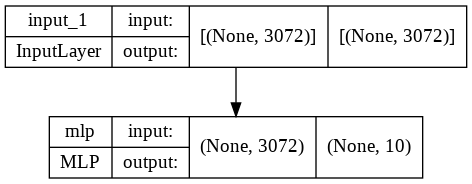

In [13]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 mlp (MLP)                   (None, 10)                776360    
                                                                 
Total params: 776,360
Trainable params: 776,360
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, ytrain, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.9007 - accuracy: 0.2974
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7341 - accuracy: 0.3744
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6555 - accuracy: 0.4057
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5928 - accuracy: 0.4292
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5489 - accuracy: 0.4454
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5135 - accuracy: 0.4567
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4794 - accuracy: 0.4680
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4561 - accuracy: 0.4772
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4277 - accuracy: 0.4871
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.40

In [16]:
model.evaluate(x_test, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 1.5015 - accuracy: 0.4662


[1.5015069246292114, 0.46619999408721924]

In [17]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [18]:
predict = model.predict(x_test)

In [19]:
yhat = [np.argmax(i) for i in predict]

<function matplotlib.pyplot.show>

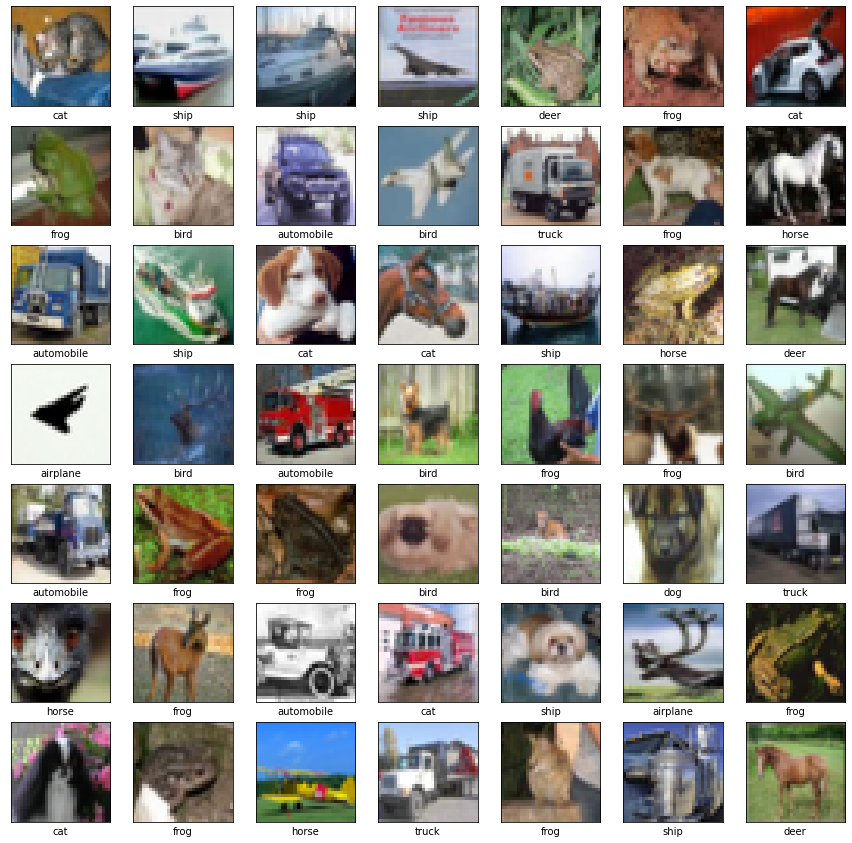

In [20]:
plt.figure(figsize=(15,15))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.imshow(xtest[i])
  plt.xlabel(classes[yhat[i]])
  plt.xticks([])
  plt.yticks([])
plt.show

In [21]:
cm = tf.math.confusion_matrix(labels= ytest, predictions=yhat)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[485,  24, 155,  27,  14,   6,  56,  46, 161,  26],
       [ 50, 574,  29,  41,  16,  12,  23,  30, 117, 108],
       [ 53,  22, 403, 102,  90,  40, 188,  73,  21,   8],
       [ 49,  14, 118, 374,  39,  97, 199,  50,  32,  28],
       [ 54,   3, 210,  72, 288,  11, 224,  97,  31,  10],
       [ 35,  10, 145, 243,  46, 235, 153,  75,  44,  14],
       [ 11,   7,  84,  74,  79,  19, 677,  20,  24,   5],
       [ 39,  13,  95,  77,  76,  43,  68, 529,  25,  35],
       [114,  52,  45,  36,  11,   7,  21,  15, 656,  43],
       [ 48, 189,  16,  60,  13,  11,  40,  66, 116, 441]], dtype=int32)>

Text(0.5, 51.0, 'Prediction')

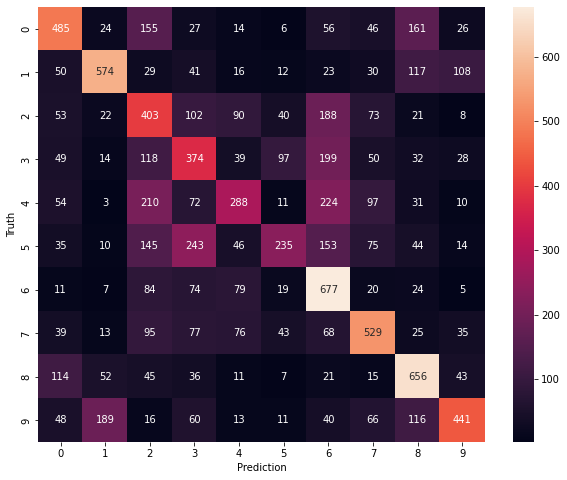

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Truth')
plt.xlabel('Prediction')


#Using Dense Layers

In [23]:
model2 = Sequential()
model2.add(Dense(300, activation = 'relu', input_shape = (nx,)))
model2.add(Dense(200, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

In [24]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 250)               25250     
                                                                 
 dense_4 (Dense)             (None, 10)                2510      
                                                                 
Total params: 1,029,960
Trainable params: 1,029,960
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

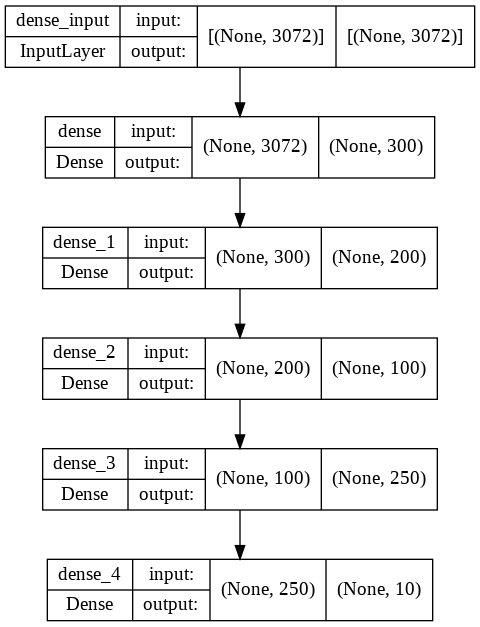

In [26]:
tf.keras.utils.plot_model(model2, to_file = 'model2.png', show_shapes=True)

In [27]:
model2.fit(x_train, ytrain, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8689 - accuracy: 0.3170
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6956 - accuracy: 0.3869
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6107 - accuracy: 0.4173
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5598 - accuracy: 0.4376
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5238 - accuracy: 0.4522
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4929 - accuracy: 0.4630
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4650 - accuracy: 0.4731
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4468 - accuracy: 0.4778
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4181 - accuracy: 0.4884
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.399

In [28]:
model2.evaluate(x_test, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 1.4851 - accuracy: 0.4718


[1.4851261377334595, 0.4717999994754791]

In [29]:
xtrain.shape[1:]

(32, 32, 3)

#Using CNN

In [30]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (xtrain.shape[1:]), padding='same'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding='same'))
model3.add(MaxPool2D(2,2))
model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))

model3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [31]:
model3.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

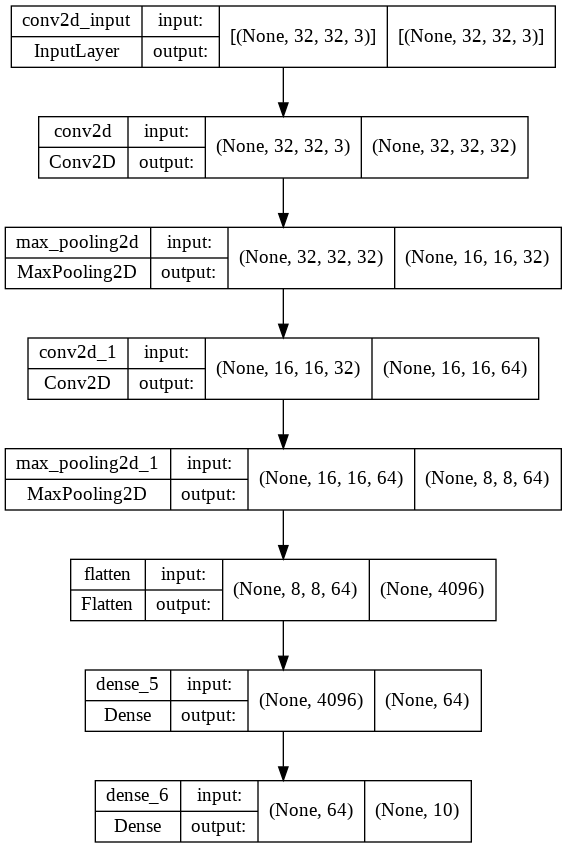

In [32]:

tf.keras.utils.plot_model(model3, to_file="model3.png", show_shapes=True)

In [33]:
model3.fit(xtrain, ytrain, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 13s 3ms/step - loss: 2.0095 - accuracy: 0.3788
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3646 - accuracy: 0.5107
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2252 - accuracy: 0.5673
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1129 - accuracy: 0.6087
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0329 - accuracy: 0.6394
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9493 - accuracy: 0.6691
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8705 - accuracy: 0.6950
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8083 - accuracy: 0.7170
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7561 - accuracy: 0.7354
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.71

In [34]:
model3.save('Models/CNN_CCIFAR-10')

INFO:tensorflow:Assets written to: Models/CNN_CCIFAR-10/assets


In [35]:
cnn = keras.models.load_model('Models/CNN_CCIFAR-10')

In [36]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [37]:
model3.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.1350 - accuracy: 0.6361


[1.1349952220916748, 0.6360999941825867]

In [38]:
predict2 = model3.predict(xtest)

In [39]:
yhat2 = [np.argmax(i) for i in predict2]

<function matplotlib.pyplot.show>

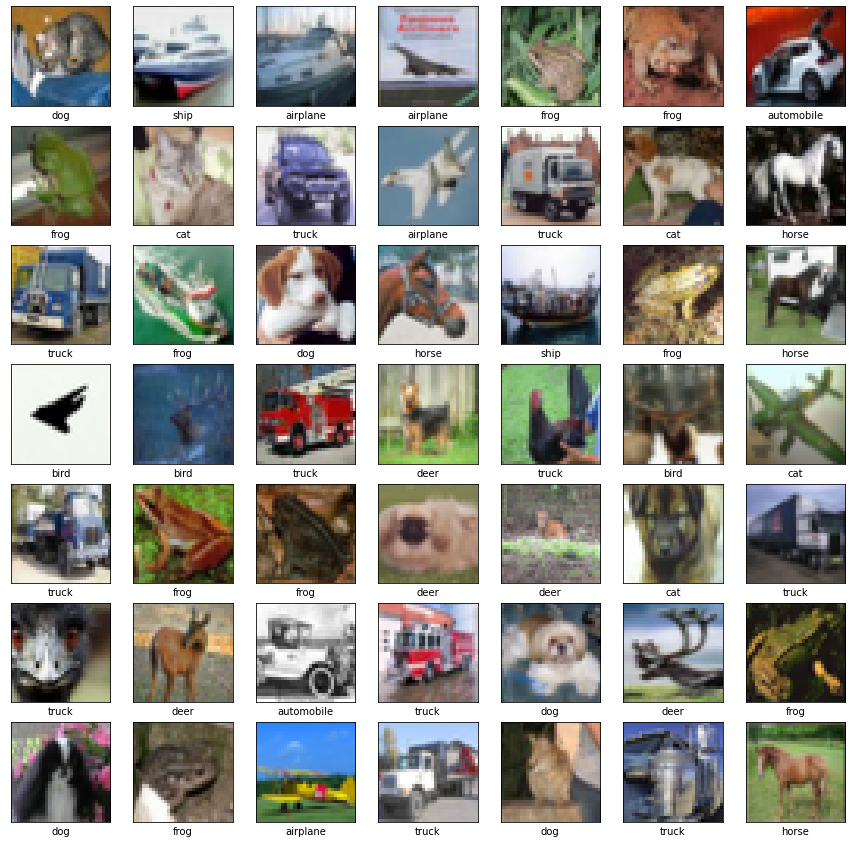

In [40]:
plt.figure(figsize=(15,15))

for i in range(49):
  plt.subplot(7,7,i+1)
  plt.imshow(xtest[i])
  plt.xlabel(classes[yhat2[i]])
  plt.xticks([])
  plt.yticks([])
plt.show

Text(0.5, 51.0, 'Prediction')

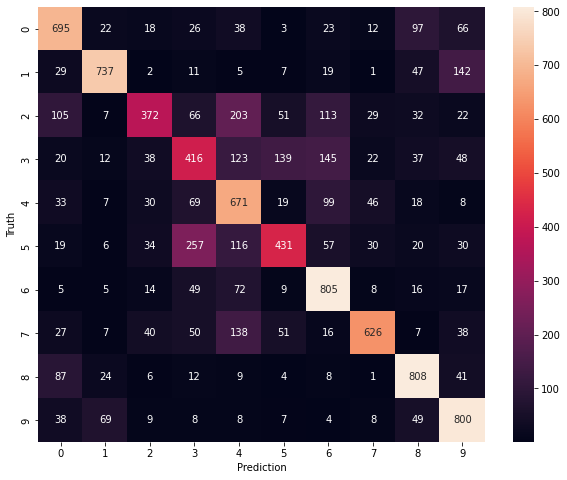

In [41]:
cm2 = tf.math.confusion_matrix(labels= ytest, predictions=yhat2)
plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, fmt='d')
plt.ylabel('Truth')
plt.xlabel('Prediction')